In [1]:
import numpy as np 
import os 
import re 
import sys 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_score 

In [3]:
os.chdir(r'\\SPPLFAPCEN02.pl.ing-ad\USERDATA\AA95MU\Desktop\ml_zadanie\Modelowanie')

In [4]:
df = pd.read_csv('data_add_cols.csv', index_col=False)

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df = df.fillna(0) 

In [7]:
df.head()

,numer_sprawy,n_docs,weekday,month,year,dowodosobisty,dowodzagraniczny,kartotekaklienta2_x,kontrolacompliance,paszport,...,Formularze_danych_osobowych+SKANER,KRS+INBOX,Dokumenty_Rejestrowe+SKANER,Dokumenty_Rejestrowe+CIB,DokumentyCashManagement+CIB,DokumentyCashManagement+SKANER,INBOX+PodrodzajA566,INBOX+imię nazwisko,SKANER+imię nazwisko,CIB+imię nazwisko
0,190502/045793,4,3,5,2019,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,190502/045818,4,3,5,2019,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,190502/049822,1,2,6,2019,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,190502/049927,1,0,5,2019,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,190502/051760,1,0,5,2019,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


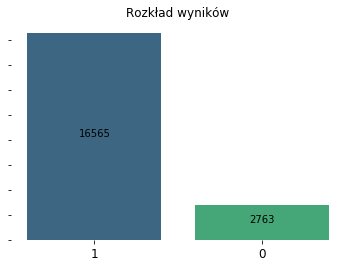

In [8]:
fig, ax = plt.subplots()
g = sns.countplot(df.response, palette='viridis')
g.set_xticklabels(['1', '0'])
g.set_yticklabels([])

#ciekawe ustawienie wartosci na wykresie
def show_values(axs):
    def show_plot(ax):
        for el in ax.patches:
            x = el.get_x() + el.get_width()/2
            y = el.get_y() + el.get_height()/2
            value = f"{el.get_height()}"
            ax.text(x,y,value, ha="center")
    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            show_plot(ax)
    else:
        show_plot(axs)
        
show_values(ax)
sns.despine(left=True, bottom=True)
plt.title('Rozkład wyników')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.show()

In [9]:
df.response.value_counts()

0.0    16565
1.0     2763
Name: response, dtype: int64

In [10]:
(df.loc[df.response == 0].shape[0]/df.loc[df.response == 1].shape[0] )* 100 
#chyba jest pozno i nie widze bo powinno byc 16% 

599.5294969236338

In [11]:
#train, test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df.response
X = df.drop(['numer_sprawy', 'response'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.4, random_state = 29)

In [14]:
#use baseline models (predykcja tylko pozytywnych ponieważ jest przewaga)

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [17]:
print(f"Labels predict {np.unique(dummy_pred)}")

Labels predict [0.]


In [18]:
print(f"Score: {accuracy_score(y_test, dummy_pred)}")

Score: 0.8491981376099328


In [19]:
#duzy wynik

In [20]:
#jak to wyglada dla innej metody

In [21]:
#logistic regression

In [22]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
logreg_pred = logreg.predict(X_test)

In [24]:
accuracy_score(y_test, logreg_pred)

0.8564407656492499

In [25]:
#również duży wynik predykcji (dla naive bayes, kneigbors to samo było(poprzedni html))

In [26]:
pred_score = pd.DataFrame(logreg_pred)
pred_score.head()

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [27]:
pred_score[0].value_counts()

0.0    7532
1.0     200
Name: 0, dtype: int64

In [28]:
#różnica miedzy Dummy a Logistic Regresion to niecałe pół procenta na wyniku, trzeba coś z tym zrobić

In [29]:
f1_score(y_test, logreg_pred)

0.18740849194729137

In [30]:
pd.DataFrame(confusion_matrix(y_test, logreg_pred))

,0,1
0,6494,72
1,1038,128


In [31]:
recall_score(y_test, logreg_pred)

0.1097770154373928

In [32]:
#możemy wywnsioskować że pomimo wyniku predykcji na poziomie 86% nie są miarodajne

In [33]:
#Sprawdzę jak to wygląda dla poprzednich trzech metod

In [34]:
type(logreg_pred)

numpy.ndarray

In [35]:
type(y_test)

pandas.core.series.Series

In [106]:
def show_scores(y_test: pd.core.series.Series, method_pred: np.ndarray, meth_name: str):
    acc_result = accuracy_score(y_test, method_pred)
    f1_result =  f1_score(y_test, method_pred)
    matrix_result = pd.DataFrame(confusion_matrix(y_test, method_pred))
    recall_result = recall_score(y_test, method_pred)
    precision_result = precision_score(y_test, method_pred)
    
    print("-"*100)
    print(f"{meth_name}")
    print("-"*100)
    print(f"accuracy: {acc_result}")
    print(f"f1 score: {f1_result}")
    print(f"confusion matrix:\n{matrix_result}")
    print(f"recal score: {recall_result}")
    print(f"precision score: {recall_result}")

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

show_scores(y_test, gnb_pred, "GaussianNB")

----------------------------------------------------------------------------------------------------
GaussianNB
----------------------------------------------------------------------------------------------------
accuracy: 0.185980341438179
f1 score: 0.2619606003752345
confusion matrix:
     0     1
0  321  6245
1   49  1117
recal score: 0.9579759862778731
precision score: 0.9579759862778731


In [108]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(random_state = 0)

svc_pred = svc_model.fit(X_train, y_train).predict(X_test)

show_scores(y_test, svc_pred, "LinearSVC")

----------------------------------------------------------------------------------------------------
LinearSVC
----------------------------------------------------------------------------------------------------
accuracy: 0.15106052767718572
f1 score: 0.26214028776978415
confusion matrix:
   0     1
0  2  6564
1  0  1166
recal score: 1.0
precision score: 1.0


In [109]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier(n_neighbors = 2)

kn_pred = KN.fit(X_train, y_train).predict(X_test)

show_scores(y_test, kn_pred, "KNeighborsClassifier")

----------------------------------------------------------------------------------------------------
KNeighborsClassifier
----------------------------------------------------------------------------------------------------
accuracy: 0.7771598551474392
f1 score: 0.15745721271393642
confusion matrix:
      0    1
0  5848  718
1  1005  161
recal score: 0.13807890222984562
precision score: 0.13807890222984562


In [110]:
from sklearn.utils import resample

In [111]:
X = pd.concat([X_train, y_train], axis=1)

# seprate miniority & majority

In [112]:
bad = X[X.response == 0]

In [113]:
good = X[X.response == 1]

# unsample miniority # oversampling

In [114]:
bad_unsampled = resample(bad, replace=False, n_samples=len(good), random_state=27)

In [115]:
unsampled = pd.concat([good, bad_unsampled])

In [116]:
unsampled.response.value_counts()

0.0    9999
1.0    9999
Name: response, dtype: int64

In [117]:
#udalo sie wyrównać

In [118]:
y_train = unsampled.response

In [119]:
X_train = unsampled.drop(['response'], axis=1)

In [120]:
#logistic regression

In [121]:
unsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
unsampled_pred = unsampled.predict(X_test)

In [122]:
show_scores(y_test, unsampled_pred, "LogisticRegression")

----------------------------------------------------------------------------------------------------
LogisticRegression
----------------------------------------------------------------------------------------------------
accuracy: 0.7898344542162442
f1 score: 0.46703837323712694
confusion matrix:
      0     1
0  5395  1171
1   454   712
recal score: 0.6106346483704974
precision score: 0.6106346483704974


In [123]:
#naive bayes

In [124]:
gnb = GaussianNB()

gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

show_scores(y_test, gnb_pred, "GaussianNB")

----------------------------------------------------------------------------------------------------
GaussianNB
----------------------------------------------------------------------------------------------------
accuracy: 0.185980341438179
f1 score: 0.2619606003752345
confusion matrix:
     0     1
0  321  6245
1   49  1117
recal score: 0.9579759862778731
precision score: 0.9579759862778731


In [125]:
#dramat

In [126]:
KN = KNeighborsClassifier(n_neighbors = 2)

kn_pred = KN.fit(X_train, y_train).predict(X_test)

show_scores(y_test, kn_pred, "KNeighborsClassifier")

----------------------------------------------------------------------------------------------------
KNeighborsClassifier
----------------------------------------------------------------------------------------------------
accuracy: 0.7769011898603208
f1 score: 0.15730337078651685
confusion matrix:
      0    1
0  5846  720
1  1005  161
recal score: 0.13807890222984562
precision score: 0.13807890222984562


# Wyniki nie są zadowalające, sprawdzmy undersampling

In [127]:
good_downsampled = resample(good, replace=True, n_samples=len(bad), random_state=27)

In [128]:
downsampled = pd.concat([good_downsampled, bad])

In [129]:
downsampled.response.value_counts()

0.0    9999
1.0    9999
Name: response, dtype: int64

In [130]:
y_train = downsampled.response

X_train = downsampled.drop(['response'], axis=1)

In [131]:
#logistic regression

In [132]:
under_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [133]:
under_lr_pred = under_lr.predict(X_test)

In [134]:
show_scores(y_test, under_lr_pred, "LogisticRegression")

----------------------------------------------------------------------------------------------------
LogisticRegression
----------------------------------------------------------------------------------------------------
accuracy: 0.7864718054837041
f1 score: 0.4606337798105195
confusion matrix:
      0     1
0  5376  1190
1   461   705
recal score: 0.6046312178387651
precision score: 0.6046312178387651


In [135]:
#naive bayes

gnb = GaussianNB()

gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

show_scores(y_test, gnb_pred, "GaussianNB")

----------------------------------------------------------------------------------------------------
GaussianNB
----------------------------------------------------------------------------------------------------
accuracy: 0.18701500258665288
f1 score: 0.262206572769953
confusion matrix:
     0     1
0  329  6237
1   49  1117
recal score: 0.9579759862778731
precision score: 0.9579759862778731


In [136]:
#dramat

KN = KNeighborsClassifier(n_neighbors = 3)

kn_pred = KN.fit(X_train, y_train).predict(X_test)

show_scores(y_test, kn_pred, "KNeighborsClassifier")

----------------------------------------------------------------------------------------------------
KNeighborsClassifier
----------------------------------------------------------------------------------------------------
accuracy: 0.7176668391101914
f1 score: 0.20415603353991982
confusion matrix:
      0     1
0  5269  1297
1   886   280
recal score: 0.24013722126929674
precision score: 0.24013722126929674
